In [36]:
#AIML : Models Comparison & Best Model Selection for Fraud Detections

In [37]:
import pandas as pd

In [38]:
f=pd.read_csv("fraudTest.csv") #loading data
f 

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,MO,63453,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,83643,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [39]:
f.isnull().sum() #to check null vales

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [40]:
f.dtypes #to check data types

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [41]:
pd.options.display.max_columns=500
f.head() #max columns display 

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [42]:
f.select_dtypes(include=['object']).columns #object columns

Index(['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
       'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num'],
      dtype='object')

In [43]:
f['trans_date_trans_time']=pd.to_datetime(f['trans_date_trans_time'],errors="coerce") #date time conversion
f['dob']=pd.to_datetime(f['dob'],errors="coerce")

In [44]:
f['dob']=f['dob'].dt.year #to extract year and int conversion
f['trans_date_trans_time']=f['trans_date_trans_time'].dt.year

In [45]:
f.dtypes

Unnamed: 0                 int64
trans_date_trans_time      int32
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                        int32
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [46]:
f.describe(include='all') #understanding data for in depth EDA 

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,555719.0,5.557190e+05,555719,555719,555719.000000,555719,555719,555719,555719,555719,555719,555719.000000,555719.000000,555719.000000,5.557190e+05,555719,555719.000000,555719,5.557190e+05,555719.000000,555719.000000,555719.000000
unique,NaN,NaN,NaN,693,14,NaN,341,471,2,924,849,50,NaN,NaN,NaN,NaN,478,NaN,555719,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,fraud_Kilback LLC,gas_transport,NaN,Christopher,Smith,F,444 Robert Mews,Birmingham,TX,NaN,NaN,NaN,NaN,Film/video editor,NaN,1765bb45b3aa3224b4cdcb6e7a96cee3,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1859,56370,NaN,11443,12146,304886,1474,2423,40393,NaN,NaN,NaN,NaN,4119,NaN,1,NaN,NaN,NaN,NaN
mean,277859.000000,2020.0,4.178387e+17,NaN,NaN,69.392810,NaN,NaN,NaN,NaN,NaN,NaN,48842.628015,38.543253,-90.231325,8.822189e+04,NaN,1973.363763,NaN,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,0.0,1.309837e+18,NaN,NaN,156.745941,NaN,NaN,NaN,NaN,NaN,NaN,26855.283328,5.061336,13.721780,3.003909e+05,NaN,17.418528,NaN,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,2020.0,6.041621e+10,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1257.000000,20.027100,-165.672300,2.300000e+01,NaN,1924.000000,NaN,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,2020.0,1.800429e+14,NaN,NaN,9.630000,NaN,NaN,NaN,NaN,NaN,NaN,26292.000000,34.668900,-96.798000,7.410000e+02,NaN,1962.000000,NaN,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,2020.0,3.521417e+15,NaN,NaN,47.290000,NaN,NaN,NaN,NaN,NaN,NaN,48174.000000,39.371600,-87.476900,2.408000e+03,NaN,1975.000000,NaN,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,2020.0,4.635331e+15,NaN,NaN,83.010000,NaN,NaN,NaN,NaN,NaN,NaN,72011.000000,41.894800,-80.175200,1.968500e+04,NaN,1987.000000,NaN,1.385867e+09,41.954163,-80.264637,0.000000


In [47]:
merchant20=f['merchant'].value_counts().nlargest(20).index #storing top 20 occuring variables in merchant column

In [48]:
import numpy as np
f['merchant']=np.where(f['merchant'].isin(merchant20),f['merchant'],"Others") #changing data keeping only top 20 classifying rest of them as others

In [49]:
f['merchant'].value_counts()

merchant
Others                                 529855
fraud_Kilback LLC                        1859
fraud_Cormier LLC                        1597
fraud_Schumm PLC                         1561
fraud_Kuhn LLC                           1521
fraud_Dickinson Ltd                      1519
fraud_Boyer PLC                          1506
fraud_Emard Inc                          1226
fraud_Parisian and Sons                  1202
fraud_Corwin-Collins                     1178
fraud_Streich, Hansen and Veum           1168
fraud_Robel, Cummerata and Prosacco      1165
fraud_Schaefer, McGlynn and Bosco        1163
fraud_Zieme, Bode and Dooley             1160
fraud_Huels-Hahn                         1157
fraud_Kling Inc                          1154
fraud_Raynor, Feest and Miller           1152
fraud_Reilly, Heaney and Cole            1147
fraud_Ledner-Pfannerstill                1145
fraud_Mraz-Herzog                        1142
fraud_Raynor, Reinger and Hagenes        1142
Name: count, dtype: int64

In [50]:
city15=f['city'].value_counts().nlargest(15).index #similarly for other columns

In [51]:
f['city']=np.where(f['city'].isin(city15),f['city'],"Others")

In [52]:
job15=f['job'].value_counts().nlargest(15).index

In [53]:
f['job']=np.where(f['job'].isin(job15),f['job'],"others")

In [54]:
f1=f.copy() #copy of dataset

In [55]:
f1.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020,2291163933867244,Others,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Others,SC,29209,33.9659,-80.9355,333497,others,1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020,3573030041201292,Others,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Others,UT,84002,40.3207,-110.4360,302,others,1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020,3598215285024754,Others,health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Others,NY,11710,40.6729,-73.5365,34496,others,1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020,3591919803438423,Others,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Others,FL,32780,28.5697,-80.8191,54767,others,1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020,3526826139003047,Others,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Others,MI,49632,44.2529,-85.0170,1126,others,1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [56]:
f1=f1.drop(columns=['Unnamed: 0','cc_num','first','last','street','state','trans_num']) #dropping un necessary columns
f1.head()

,trans_date_trans_time,merchant,category,amt,gender,city,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,2020,Others,personal_care,2.86,M,Others,29209,33.9659,-80.9355,333497,others,1968,1371816865,33.986391,-81.200714,0
1,2020,Others,personal_care,29.84,F,Others,84002,40.3207,-110.4360,302,others,1990,1371816873,39.450498,-109.960431,0
2,2020,Others,health_fitness,41.28,F,Others,11710,40.6729,-73.5365,34496,others,1970,1371816893,40.495810,-74.196111,0
3,2020,Others,misc_pos,60.05,M,Others,32780,28.5697,-80.8191,54767,others,1987,1371816915,28.812398,-80.883061,0
4,2020,Others,travel,3.19,M,Others,49632,44.2529,-85.0170,1126,others,1955,1371816917,44.959148,-85.884734,0


In [57]:
f1.describe(include='all')

,trans_date_trans_time,merchant,category,amt,gender,city,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
count,555719.0,555719,555719,555719.000000,555719,555719,555719.000000,555719.000000,555719.000000,5.557190e+05,555719,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000
unique,NaN,21,14,NaN,2,16,NaN,NaN,NaN,NaN,16,NaN,NaN,NaN,NaN,NaN
top,NaN,Others,gas_transport,NaN,F,Others,NaN,NaN,NaN,NaN,others,NaN,NaN,NaN,NaN,NaN
freq,NaN,529855,56370,NaN,304886,526034,NaN,NaN,NaN,NaN,504878,NaN,NaN,NaN,NaN,NaN
mean,2020.0,NaN,NaN,69.392810,NaN,NaN,48842.628015,38.543253,-90.231325,8.822189e+04,NaN,1973.363763,1.380679e+09,38.542798,-90.231380,0.003860
std,0.0,NaN,NaN,156.745941,NaN,NaN,26855.283328,5.061336,13.721780,3.003909e+05,NaN,17.418528,5.201104e+06,5.095829,13.733071,0.062008
min,2020.0,NaN,NaN,1.000000,NaN,NaN,1257.000000,20.027100,-165.672300,2.300000e+01,NaN,1924.000000,1.371817e+09,19.027422,-166.671575,0.000000
25%,2020.0,NaN,NaN,9.630000,NaN,NaN,26292.000000,34.668900,-96.798000,7.410000e+02,NaN,1962.000000,1.376029e+09,34.755302,-96.905129,0.000000
50%,2020.0,NaN,NaN,47.290000,NaN,NaN,48174.000000,39.371600,-87.476900,2.408000e+03,NaN,1975.000000,1.380762e+09,39.376593,-87.445204,0.000000
75%,2020.0,NaN,NaN,83.010000,NaN,NaN,72011.000000,41.894800,-80.175200,1.968500e+04,NaN,1987.000000,1.385867e+09,41.954163,-80.264637,0.000000


In [58]:
#one hot encoding for categorical cols and dropping that columns 
f1=f1.join(pd.get_dummies(f1['gender'],prefix='gender_')).drop('gender',axis=1)
f1.head()

,trans_date_trans_time,merchant,category,amt,city,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud,gender__F,gender__M
0,2020,Others,personal_care,2.86,Others,29209,33.9659,-80.9355,333497,others,1968,1371816865,33.986391,-81.200714,0,False,True
1,2020,Others,personal_care,29.84,Others,84002,40.3207,-110.4360,302,others,1990,1371816873,39.450498,-109.960431,0,True,False
2,2020,Others,health_fitness,41.28,Others,11710,40.6729,-73.5365,34496,others,1970,1371816893,40.495810,-74.196111,0,True,False
3,2020,Others,misc_pos,60.05,Others,32780,28.5697,-80.8191,54767,others,1987,1371816915,28.812398,-80.883061,0,False,True
4,2020,Others,travel,3.19,Others,49632,44.2529,-85.0170,1126,others,1955,1371816917,44.959148,-85.884734,0,False,True


In [59]:
f1=f1.join(pd.get_dummies(f1['merchant'],prefix="mer_")).drop('merchant',axis=1)

In [60]:
f1=f1.join(pd.get_dummies(f1['category'],prefix="cate_")).drop('category',axis=1)

In [61]:
f1=f1.join(pd.get_dummies(f1['city'],prefix="city_")).drop('city',axis=1)

In [62]:
f1=f1.join(pd.get_dummies(f1['job'],prefix="job_")).drop('job',axis=1)

In [63]:
f1.dtypes

trans_date_trans_time              int32
amt                              float64
zip                                int64
lat                              float64
long                             float64
                                  ...   
job__Naval architect                bool
job__Scientist, audiological        bool
job__Surveyor, land/geomatics       bool
job__Systems developer              bool
job__others                         bool
Length: 80, dtype: object

In [64]:
#transform entire data true as 1 false as 0 else data remains same
f1=f1.map(lambda x:1 if x is True else 0 if x is False else x)
f1.head()

,trans_date_trans_time,amt,zip,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud,gender__F,gender__M,mer__Others,mer__fraud_Boyer PLC,mer__fraud_Cormier LLC,mer__fraud_Corwin-Collins,mer__fraud_Dickinson Ltd,mer__fraud_Emard Inc,mer__fraud_Huels-Hahn,mer__fraud_Kilback LLC,mer__fraud_Kling Inc,mer__fraud_Kuhn LLC,mer__fraud_Ledner-Pfannerstill,mer__fraud_Mraz-Herzog,mer__fraud_Parisian and Sons,"mer__fraud_Raynor, Feest and Miller","mer__fraud_Raynor, Reinger and Hagenes","mer__fraud_Reilly, Heaney and Cole","mer__fraud_Robel, Cummerata and Prosacco","mer__fraud_Schaefer, McGlynn and Bosco",mer__fraud_Schumm PLC,"mer__fraud_Streich, Hansen and Veum","mer__fraud_Zieme, Bode and Dooley",cate__entertainment,cate__food_dining,cate__gas_transport,cate__grocery_net,cate__grocery_pos,cate__health_fitness,cate__home,cate__kids_pets,cate__misc_net,cate__misc_pos,cate__personal_care,cate__shopping_net,cate__shopping_pos,cate__travel,city__Arcadia,city__Birmingham,city__Brandon,city__Cleveland,city__Conway,city__Fulton,city__Houston,city__Indianapolis,city__Meridian,city__Naples,city__Others,city__Phoenix,city__San Antonio,city__Thomas,city__Utica,city__Warren,job__Chartered public finance accountant,job__Chief Executive Officer,"job__Copywriter, advertising","job__Designer, ceramics/pottery",job__Environmental consultant,job__Exhibition designer,job__Film/video editor,job__Financial adviser,job__IT trainer,job__Magazine features editor,job__Materials engineer,job__Naval architect,"job__Scientist, audiological","job__Surveyor, land/geomatics",job__Systems developer,job__others
0,2020,2.86,29209,33.9659,-80.9355,333497,1968,1371816865,33.986391,-81.200714,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2020,29.84,84002,40.3207,-110.4360,302,1990,1371816873,39.450498,-109.960431,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2020,41.28,11710,40.6729,-73.5365,34496,1970,1371816893,40.495810,-74.196111,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2020,60.05,32780,28.5697,-80.8191,54767,1987,1371816915,28.812398,-80.883061,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2020,3.19,49632,44.2529,-85.0170,1126,1955,1371816917,44.959148,-85.884734,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [65]:
f['is_fraud'].value_counts(normalize=True)*100 #target feature check

is_fraud
0    99.614014
1     0.385986
Name: proportion, dtype: float64

In [66]:
#features Target separation for AIML modelling
X,y=f1.drop('is_fraud',axis=1),f1['is_fraud'] #X : Features Independent variables , y : Target dependent variables

In [67]:
#Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42,stratify=y)

In [68]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() #datapreprocessing technique used to bring different numeric features to similar range

In [69]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [35]:
#1 Logistic Regression : A Supervised ML Algorithm used for Binary classification that predicts the probability of class using the sigmoid function

In [74]:
from sklearn.linear_model import LogisticRegression #train model logistic regression
lr=LogisticRegression(max_iter=1000,class_weight='balanced') #to balance imbalanced data class weight

In [75]:
lr.fit(X_train_scaled,y_train) #Tells the model to learn patterns

LogisticRegression(class_weight='balanced', max_iter=1000)

In [76]:
y_pred_lr=lr.predict(X_test_scaled) #makes predictions
y_pred_lr

array([0, 0, 0, ..., 1, 0, 1])

In [77]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("accuracy score :",accuracy_score(y_test,y_pred_lr)) # model accuracy score
print("precision score :",precision_score(y_test,y_pred_lr)) # ratio of correctly predicted +ves to total predicted +ves.
print("recall score :",recall_score(y_test,y_pred_lr)) # ratio of correctly predicted +ves to actual +ves (Fraud Detection high recall is valued)
print("f1 score :",f1_score(y_test,y_pred_lr)) # balance of precision & recall

accuracy score : 0.8878751889440726
precision score : 0.024800568675460075
recall score : 0.7319347319347319
f1 score : 0.0479755538579068


In [78]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_lr)) #actual values vs predicted values evaluation T : TP FN , B : FP TN

[[98368 12347]
 [  115   314]]


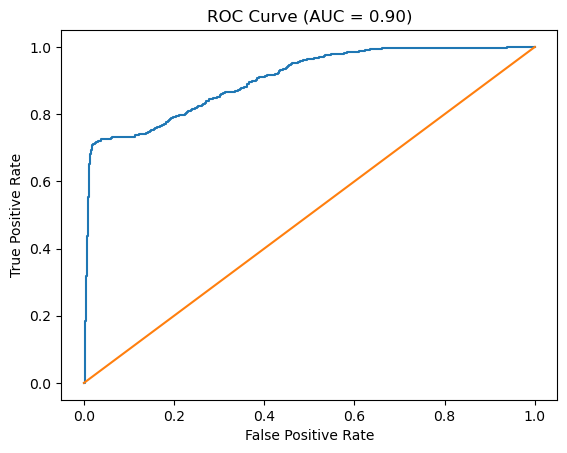

In [79]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc #receiver operating characteristics graph for model performance at different thresholds

y_prob = lr.predict_proba(X_test_scaled)[:, 1] #all rows, class 1 probabilities

fpr, tpr, thresholds = roc_curve(y_test, y_prob) #false +ve , True +ve , prob cutoff rate
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr) # (x,y) axis plot
plt.plot([0,1], [0,1]) #diagonal line 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (AUC = %0.2f)" % roc_auc) #area under curve  measures models ability 0.9 : Very Good model
plt.show()


In [42]:
#2 Decision Tree : Supervised ML Algorithm that uses flow-chart,tree-structure to map decisions

In [80]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=3,random_state=42) #max depth to control model complexity

In [81]:
dt.fit(X_train_scaled,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [82]:
y_pred_dt=dt.predict(X_test_scaled)
y_pred_dt #predicts o/p by majority votes as final prediction

array([0, 0, 0, ..., 0, 0, 0])

In [83]:
print("Decision Tree Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1-score:", f1_score(y_test, y_pred_dt))

Decision Tree Performance
Accuracy: 0.9969049161448211
Precision: 0.9885057471264368
Recall: 0.20046620046620048
F1-score: 0.3333333333333333


In [84]:
print("Train Score:", dt.score(X_train_scaled, y_train))
print("Test Score:", dt.score(X_test_scaled, y_test)) #Over fitting & Under fitting Check

Train Score: 0.9969836360569083
Test Score: 0.9969049161448211


In [85]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt, X, y, cv=5) #5 fold validation (instead of 1 : 5 accuracy scores)
print(scores.mean()) # CV & Train,test scores 0.9 : Very strong model but looking at accuracy precision , recall , f1 not that deal

0.996991285137961


In [86]:
from sklearn.tree import plot_tree

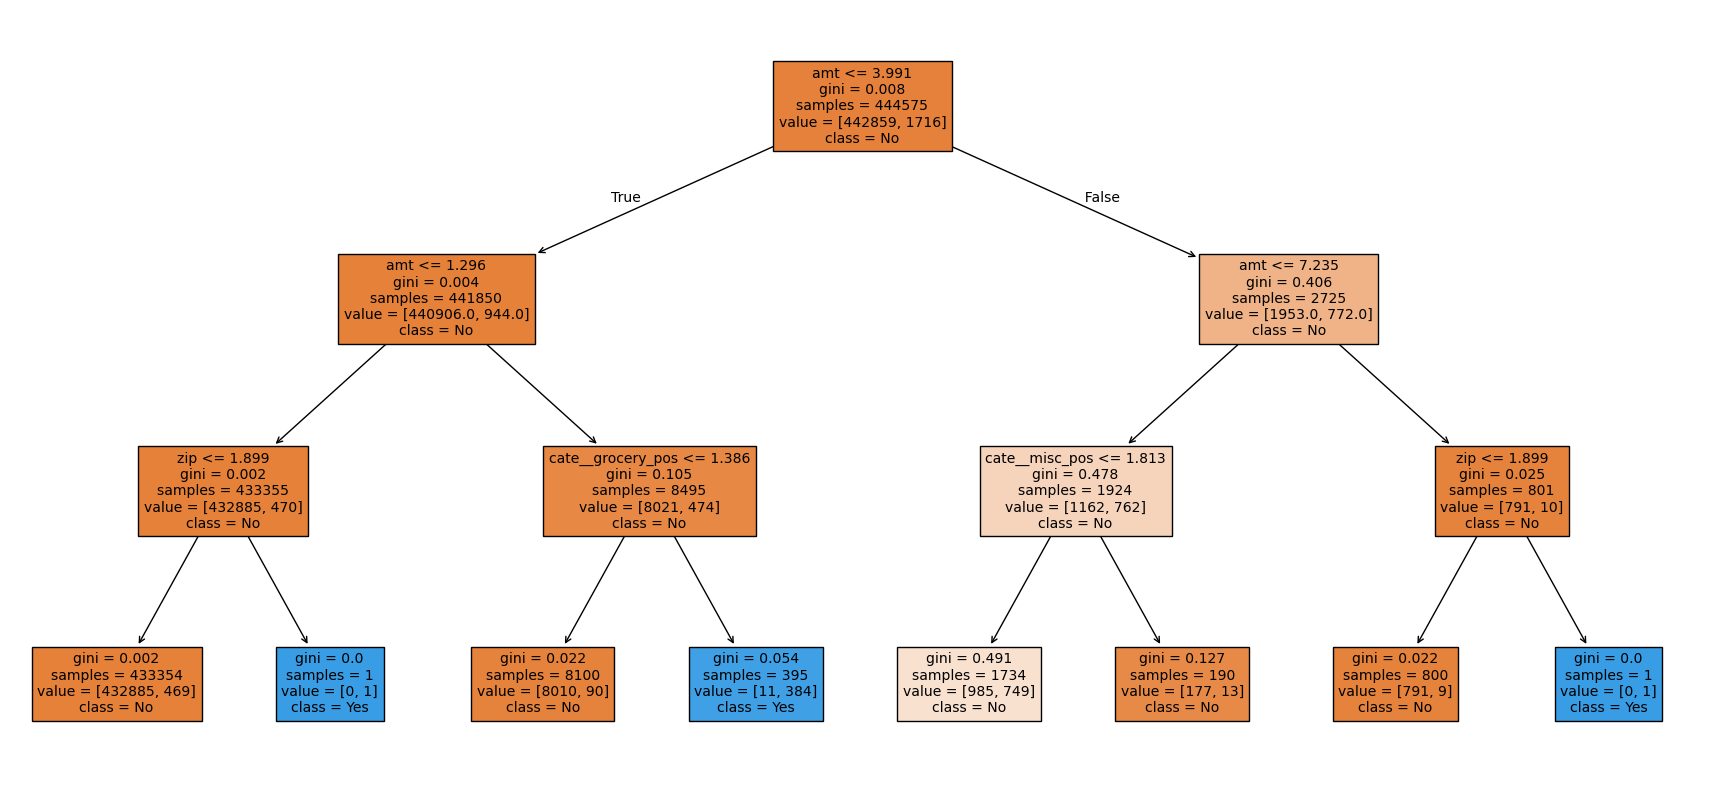

In [87]:
plt.figure(figsize=(22,10))
plot_tree(dt,feature_names=X.columns,class_names=["No","Yes"],filled=True)
plt.show() #gini measures impurity , Dark colour more pure , class at leaf is final prediction

In [51]:
#3 Random Forest : ML Algorithm based on several decision trees instead of 1 tree

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
rf=RandomForestClassifier(n_estimators=500,max_depth=20,min_samples_split=10,min_samples_leaf=5,class_weight='balanced',random_state=42,n_jobs=-1) #500 decision trees,bootstrapping,-1 for faster training use all cores

In [90]:
from imblearn.over_sampling import SMOTE #synthetic minority over sampling technique used to balance data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

In [91]:
print("Before SMOTE:\n", y_train.value_counts())
print("After SMOTE:\n", y_resampled.value_counts()) #fail overfitting  over sampling issue check

Before SMOTE:
 is_fraud
0    442859
1      1716
Name: count, dtype: int64
After SMOTE:
 is_fraud
0    442859
1    442859
Name: count, dtype: int64


In [92]:
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=5, min_samples_split=10,
                       n_estimators=500, n_jobs=-1, random_state=42)

In [93]:
rf.score(X_test,y_test) #accuracy score

0.9950424674296409

In [94]:
y_pred_rf=rf.predict(X_test)
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0])

In [95]:
print("Precision score :",precision_score(y_test,y_pred_rf))
print("recall score :",recall_score(y_test,y_pred_rf)) #High recall is good for fraud detection
print("f1 score :",f1_score(y_test,y_pred_rf)) 

Precision score : 0.42685851318944845
recall score : 0.8298368298368298
f1 score : 0.5637371338083927


In [96]:
sorted_importances=dict(sorted(zip(rf.feature_names_in_,rf.feature_importances_)))
sorted_importances

{'amt': np.float64(0.557497264496221),
 'cate__entertainment': np.float64(0.00716103721907665),
 'cate__food_dining': np.float64(0.009625674195559137),
 'cate__gas_transport': np.float64(0.014862770773739205),
 'cate__grocery_net': np.float64(0.004761539897994695),
 'cate__grocery_pos': np.float64(0.022076050691019835),
 'cate__health_fitness': np.float64(0.004994435192231485),
 'cate__home': np.float64(0.010645531847467938),
 'cate__kids_pets': np.float64(0.008210541765248599),
 'cate__misc_net': np.float64(0.013129979029727828),
 'cate__misc_pos': np.float64(0.004664997684588444),
 'cate__personal_care': np.float64(0.004419320450498155),
 'cate__shopping_net': np.float64(0.03072645720418674),
 'cate__shopping_pos': np.float64(0.007850886265952109),
 'cate__travel': np.float64(0.005669128680482395),
 'city__Arcadia': np.float64(0.0011328125859679007),
 'city__Birmingham': np.float64(0.0009133215950737857),
 'city__Brandon': np.float64(0.00014646054769467187),
 'city__Cleveland': np.fl

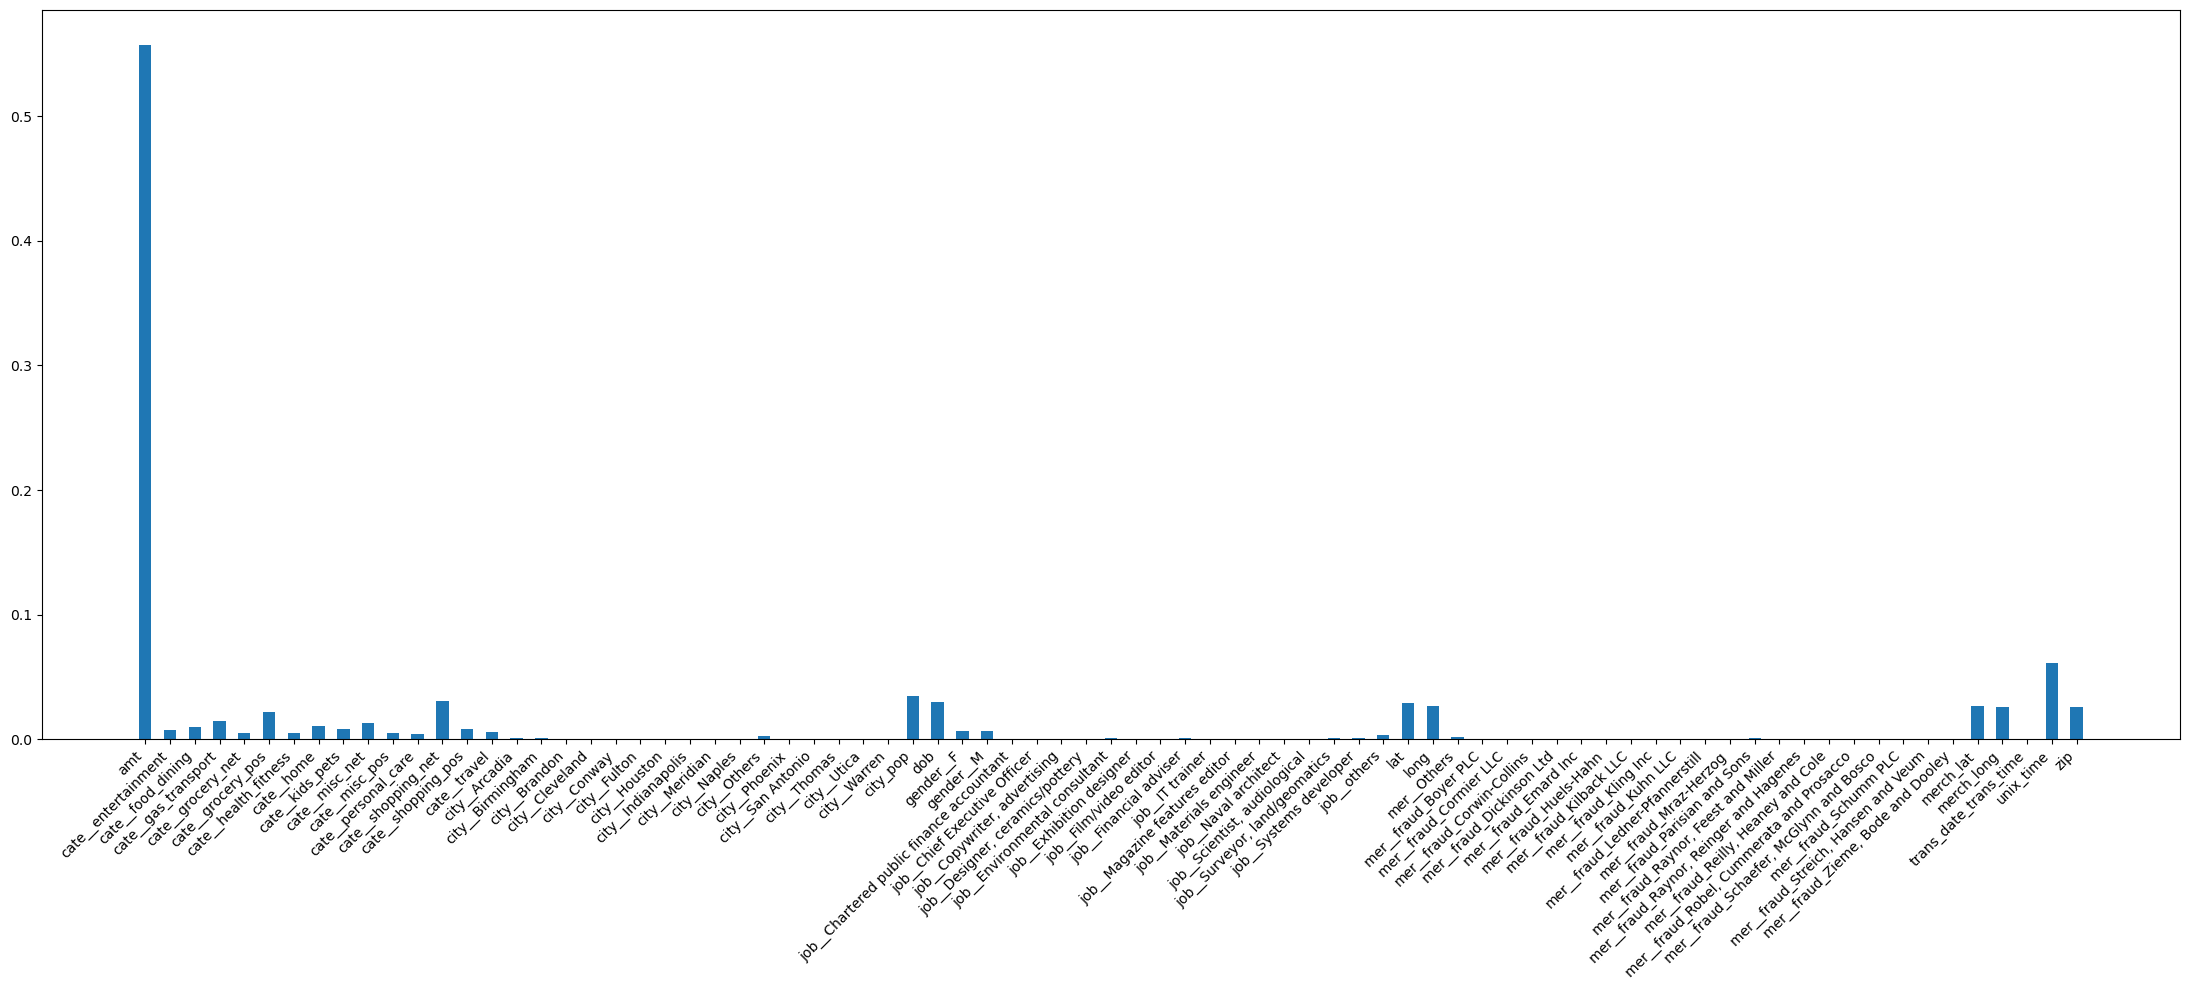

In [97]:
plt.figure(figsize=(22,10))
plt.bar(sorted_importances.keys(),sorted_importances.values(),width=0.5)
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

In [62]:
#4 : XGBoost is a powerful machine learning algorithm that builds many small decision trees step-by-step, where each new tree fixes the mistakes made by the previous ones

In [98]:
from xgboost import XGBClassifier

In [99]:
xgb=XGBClassifier(n_estimators=500,n_jobs=-1,maxdepth=6,learning_rate=0.05,objective='binary:logistic',eval_metric='auc',random_state=42)
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, maxdepth=6, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=-1, ...)

In [100]:
xgb.fit(X_train,y_train)

C:\Users\lionv\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:199: UserWarning: [15:27:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "maxdepth" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, maxdepth=6, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=-1, ...)

In [101]:
xgb.score(X_test,y_test)

0.9989203195854027

In [102]:
y_pred_xgb=xgb.predict(X_test)
y_pred_xgb

array([0, 0, 0, ..., 0, 0, 0])

In [103]:
print("Precision score :",precision_score(y_test,y_pred_xgb)) #High Precision score
print("recall score :",recall_score(y_test,y_pred_xgb)) #High recall is good for fraud detection
print("f1 score :",f1_score(y_test,y_pred_xgb)) #High f1 score

Precision score : 0.9426934097421203
recall score : 0.7668997668997669
f1 score : 0.8457583547557841


In [104]:
xbgsorted_importances=dict(sorted(zip(xgb.feature_names_in_,xgb.feature_importances_),key=lambda x:x[1],reverse=True))
xbgsorted_importances

{np.str_('cate__grocery_pos'): np.float32(0.63642377),
 np.str_('cate__shopping_pos'): np.float32(0.055552833),
 np.str_('cate__gas_transport'): np.float32(0.04281814),
 np.str_('amt'): np.float32(0.041815493),
 np.str_('cate__misc_pos'): np.float32(0.028089115),
 np.str_('cate__travel'): np.float32(0.02665558),
 np.str_('cate__home'): np.float32(0.016524823),
 np.str_('cate__grocery_net'): np.float32(0.014817904),
 np.str_('cate__entertainment'): np.float32(0.014763288),
 np.str_('mer__Others'): np.float32(0.010409838),
 np.str_('job__Film/video editor'): np.float32(0.00852448),
 np.str_('job__Scientist, audiological'): np.float32(0.008146919),
 np.str_('cate__food_dining'): np.float32(0.007896233),
 np.str_('job__Environmental consultant'): np.float32(0.0075481404),
 np.str_('cate__health_fitness'): np.float32(0.005905806),
 np.str_('cate__shopping_net'): np.float32(0.0054858914),
 np.str_('gender__F'): np.float32(0.005265905),
 np.str_('city__Others'): np.float32(0.004379739),
 np.s

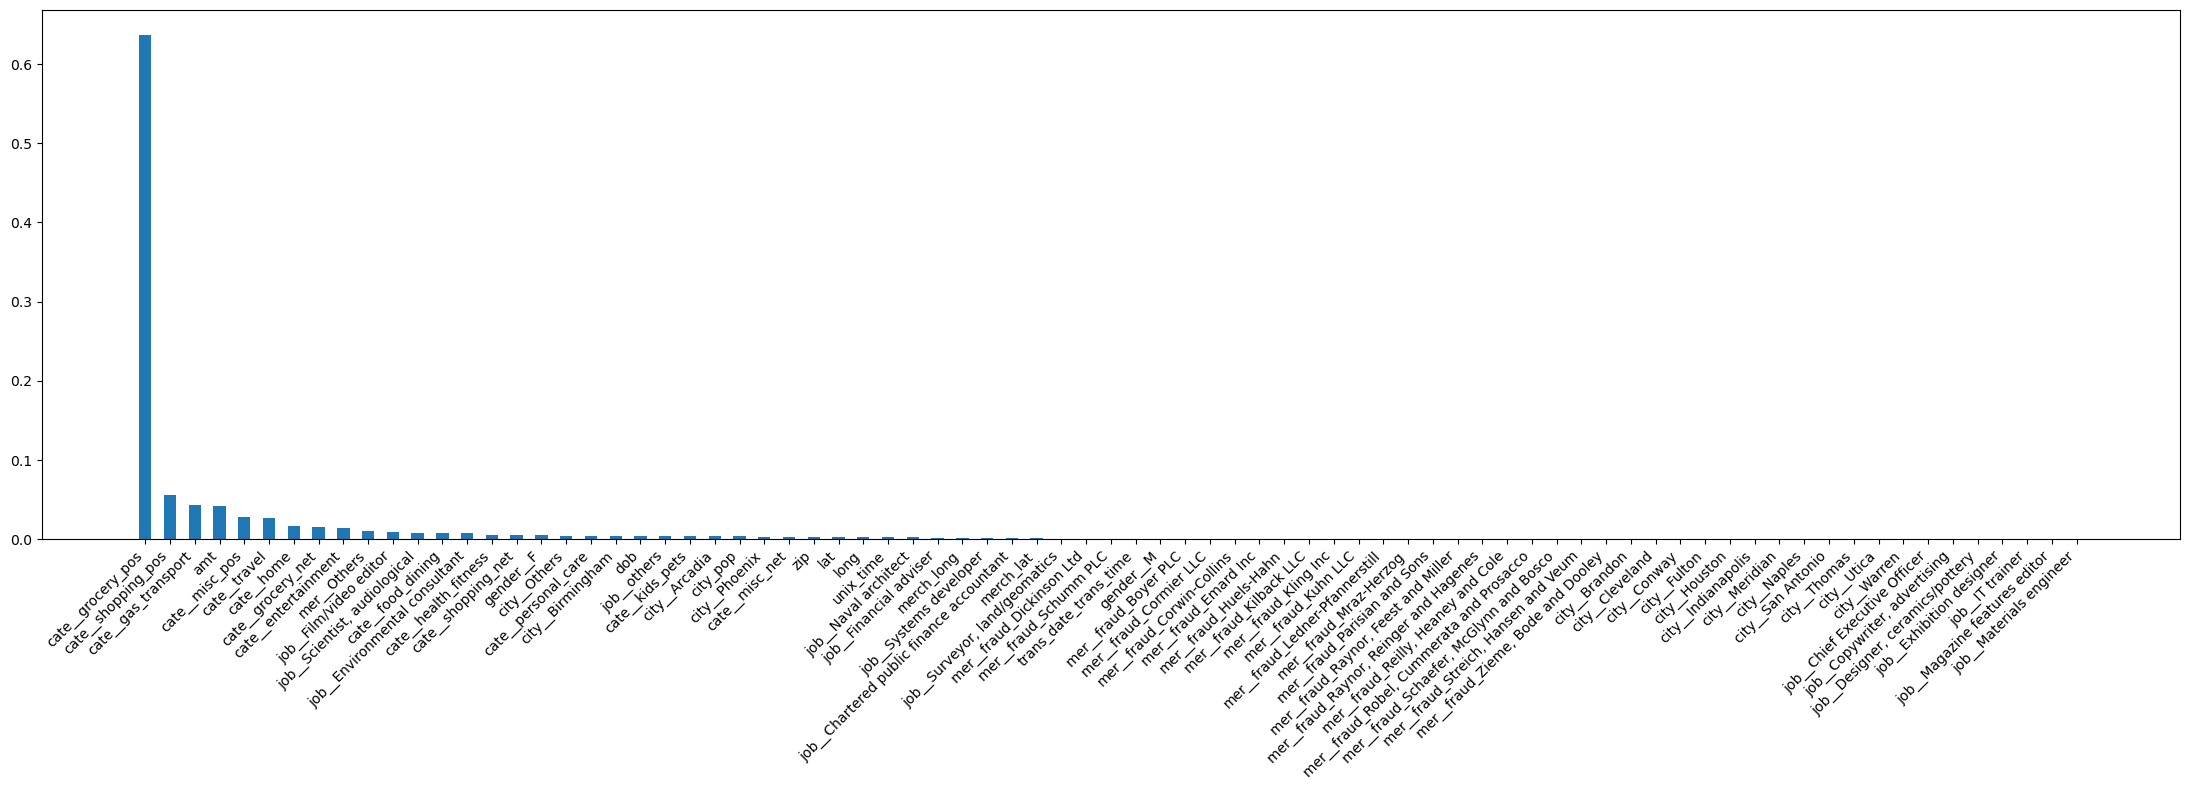

In [105]:
plt.figure(figsize=(22,8))
plt.bar(xbgsorted_importances.keys(),xbgsorted_importances.values(),width=0.5)
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

In [71]:
#5 Support Vector Machine (SVM): its a supervised ml algorithm used to find optimal hyper plane which magzimises the distance between different classes

In [70]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train_scaled,y_train)

SVC()

In [71]:
y_pred_svm=svm.predict(X_test_scaled)
y_pred_svm

array([0, 0, 0, ..., 0, 0, 0])

In [72]:
svm.score(X_test_scaled,y_test)

0.9970668682070107

In [106]:
print("SVM Performance") #SVM takes lot of time to compute n predict since its an extensive dataset
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1-score:", f1_score(y_test, y_pred_svm))

SVM Performance
Precision: 0.8503401360544217
Recall: 0.2913752913752914
F1-score: 0.4340277777777778


In [ ]:
#comparison of all 5 nmodels

In [112]:
comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "XGBoost","SVM"],
    "Train Score": [
        lr.score(X_train_scaled,y_train),
        dt.score(X_train_scaled, y_train),
        rf.score(X_train, y_train),
        xgb.score(X_train, y_train),
        svm.score(X_train_scaled, y_train)
    ],
    "Test Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb),
        accuracy_score(y_test, y_pred_svm)
    ],
    "Precision": [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_dt),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_xgb),
        precision_score(y_test, y_pred_svm)
    ],
    "Recall": [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_dt),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_xgb),
        recall_score(y_test, y_pred_svm)
    ],
    "F1-score": [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_dt),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_xgb),
        f1_score(y_test, y_pred_svm)
    ]
})

comparison


,Model,Train Score,Test Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.889627,0.887875,0.024801,0.731935,0.047976
1,Decision Tree,0.996984,0.996905,0.988506,0.200466,0.333333
2,Random Forest,0.995787,0.995042,0.426859,0.829837,0.563737
3,XGBoost,0.999440,0.998920,0.942693,0.766900,0.845758
4,SVM,0.997067,0.997067,0.850340,0.291375,0.434028


In [113]:
#Logistic Regression : struggling with class separation based on precision n f1,imbalanced data
#Decision Tree : too conservative n too low recall for fraud detection
#Random Forest : catches 82% frauds with balance but low precision 
#XGB : Solid model very strong production level performance
#SVM : Too complex not ideal for large datset too conservative 

In [ ]:
# All models have ~99% accuracy. That means: Accuracy is useless here ,Because fraud dataset is imbalanced,Accuracy is inflated.
# XGBoost n Random Forest are considered as best 